# Explore here

Paso 1: Carga del conjunto de datos

https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv


In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv')
df.head(3)

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693


Paso 2: Construye y analiza la serie temporal
Construye la estructura de datos válida para la serie temporal, grafícala y, a continuación, analízala y responde a las siguientes preguntas:

¿Cuál es el tensor de la serie temporal?
¿Cuál es la tendencia?
¿Es estacionaria?
¿Existe variabilidad o presencia de ruido?

df_ventas["date"] = pd.to_datetime(df_ventas.date)
df_ventas_2 = df_ventas.set_index("date") #definir el dato de fecha como el indice del dataframe, opcion es 
ts_ventas = df_ventas_2["sales"]
ts_ventas.head()


In [2]:
# transformar str de fecha a objeto Datetime
df['date']=pd.to_datetime(df.date)
# definir la fecha como indice del dataframe
df.index = df['date']
df.drop('date',axis=1,inplace=True)
# visualizar el dataframe
df

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633
...,...
2023-08-30 17:10:08.079328,989.600354
2023-08-31 17:10:08.079328,994.987326
2023-09-01 17:10:08.079328,995.814415


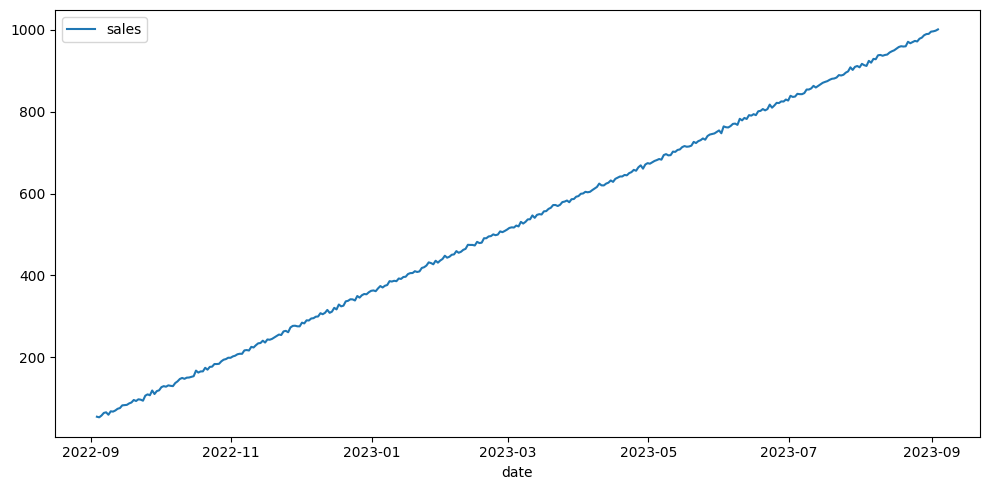

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = df)

plt.tight_layout()

plt.show()

¿Cuál es el tensor de la serie temporal? el tensor en este caso es día (la unidad minima de tiempo para los datos)
¿Cuál es la tendencia? se observa tendencia al alza, es practicamente una recta
¿Es estacionaria? no es estacionaria porque su media va aumentando a medida que aumenta el tiempo
¿Existe variabilidad o presencia de ruido? en general la variabilidad es estable en el tiempo

In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(df)

Dickey-Fuller test results:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

In [5]:
# Descomposición de la serie
from statsmodels.tsa.seasonal import seasonal_decompose

descomposicion = seasonal_decompose(df) #porque el dato está diario
descomposicion

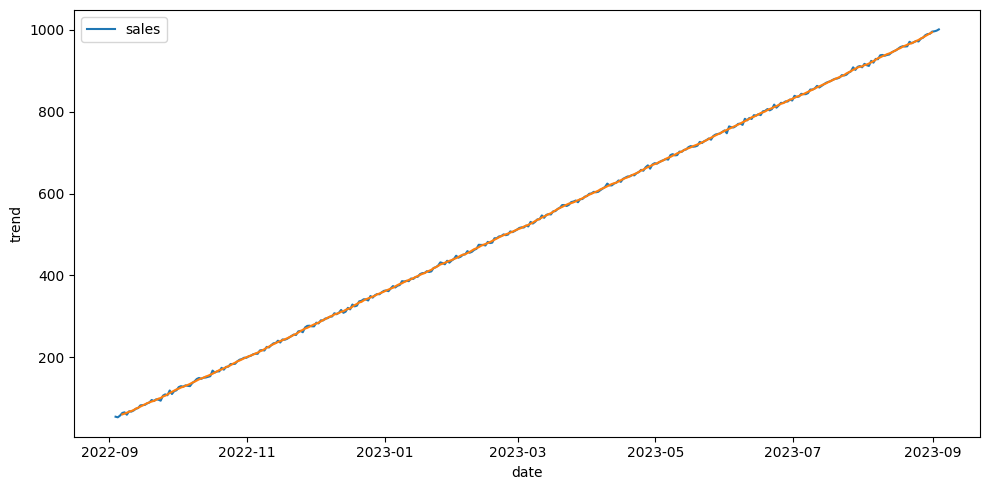

In [6]:
#Tendencia
tendencia = descomposicion.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = df)
sns.lineplot(data = tendencia)

plt.tight_layout()

plt.show()

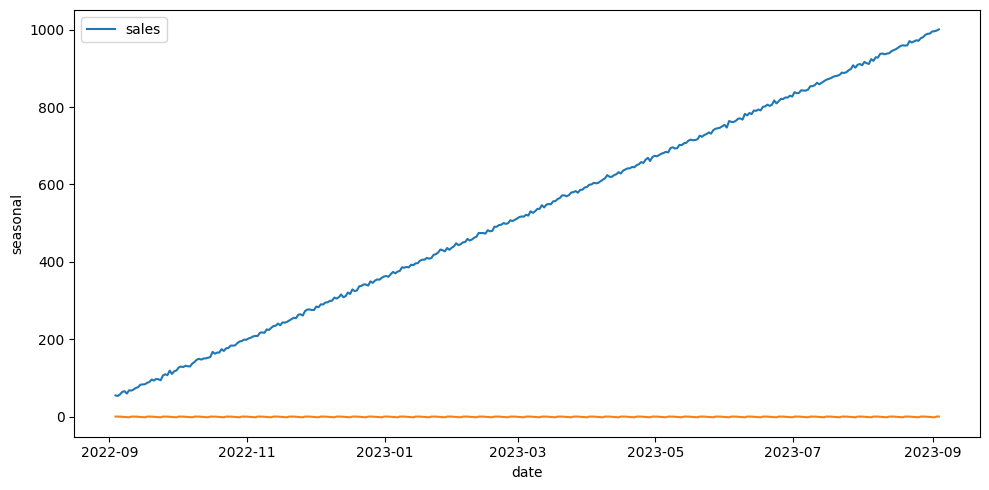

In [7]:
# Estacionalidad
estacionalidad = descomposicion.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = df)
sns.lineplot(data = estacionalidad)

plt.tight_layout()

plt.show()

In [ ]:
# realizar test dickey-fuller
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(df)

Dickey-Fuller test results:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

El p value esta cercano a 1, muy superior al nivel de significancia de 0,05, por lo tanto, la serie de tiempo no es estacionaria, es decir, su media y/o varianza no son estables en el tiempo.

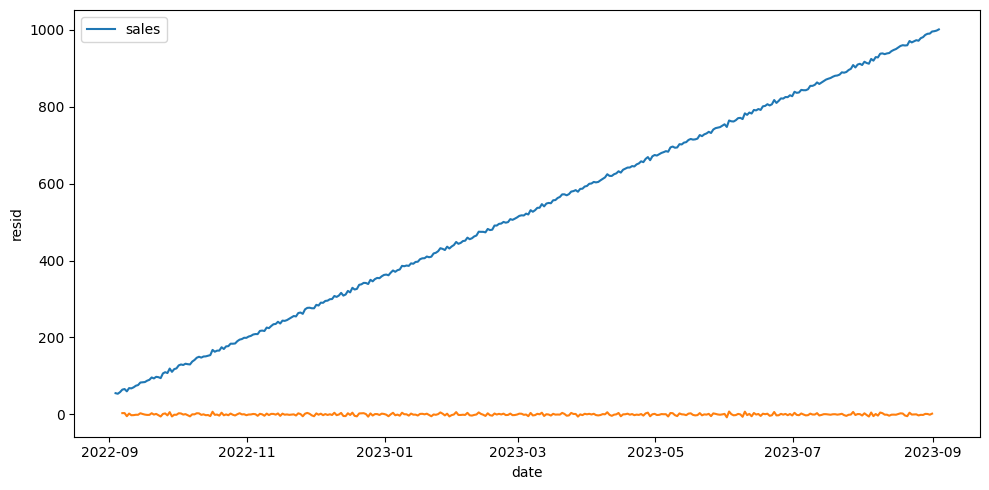

In [9]:
# Variabilidad
residuo = descomposicion.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = df)
sns.lineplot(data = residuo)

plt.tight_layout()

plt.show()

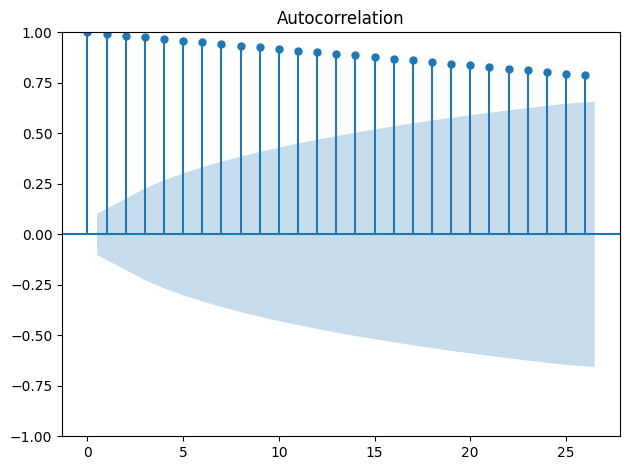

In [10]:
# Autocorrelación
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df)

plt.tight_layout()

plt.show()

La autocorrelación de los datos disminuye a medida que nos alejamos en el tiempo

Paso 3: Entrena un ARIMA

In [11]:
from pmdarima import auto_arima
#poner la versión de numpy del requirements

modelo_pred_ventas = auto_arima(df, seasonal = False, trace = True, m = 7)

/home/vscode/.local/lib/python3.10/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.274, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1841.532, Time=0.31 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1843.586, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1839.607, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.648, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.24 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.970 seconds


Paso 4: Predice con el conjunto de test

In [12]:
proyeccion = modelo_pred_ventas.predict(90) #para los proximos 3 meses
proyeccion

2023-09-04 17:10:08.079328    1002.158118
2023-09-05 17:10:08.079328    1004.831639
2023-09-06 17:10:08.079328    1007.423258
2023-09-07 17:10:08.079328    1010.021597
2023-09-08 17:10:08.079328    1012.619384
                                 ...     
2023-11-28 17:10:08.079328    1223.043568
2023-11-29 17:10:08.079328    1225.641398
2023-11-30 17:10:08.079328    1228.239227
2023-12-01 17:10:08.079328    1230.837057
2023-12-02 17:10:08.079328    1233.434886
Freq: D, Length: 90, dtype: float64

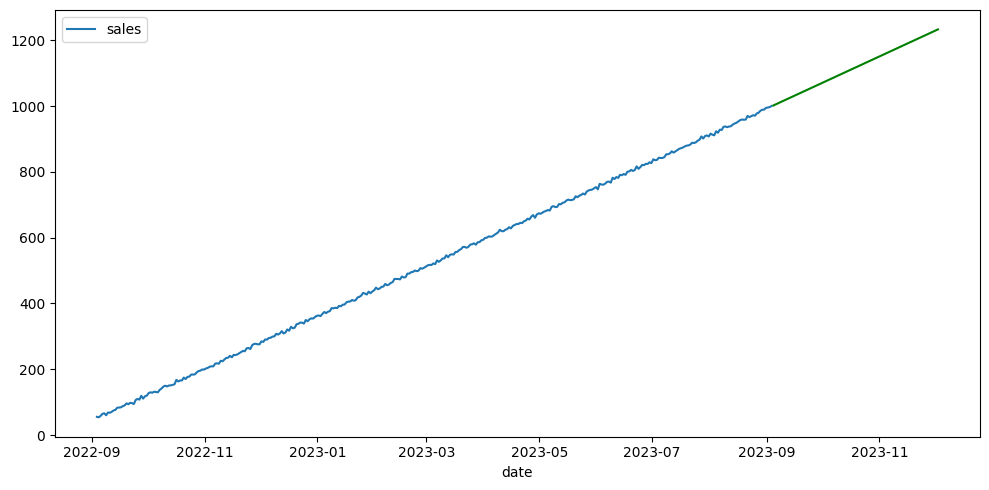

In [13]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = df)
sns.lineplot(data = proyeccion, c = "green")

plt.tight_layout()

plt.show()

Paso 5: Guarda el modelo

In [14]:
from pickle import dump

dump(modelo_pred_ventas,open('../models/st_auto_arima_1_1_1.sav','wb'))